In [1]:
%matplotlib inline
from sklearn import neural_network
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data preprocess

In [8]:
data = pd.read_csv("data/interpolation.csv")
data = data.fillna(0)

In [9]:
total_num = len(data)
test_num = np.int(0.005 * total_num)

In [10]:
train = data[0:-48]
test = data[-48:]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 16 columns):
datetime      8736 non-null object
AMB_TEMP      8736 non-null float64
CO            8736 non-null float64
NO            8736 non-null float64
NO2           8736 non-null float64
NOx           8736 non-null float64
O3            8736 non-null float64
PM10          8736 non-null float64
PM2.5         8736 non-null float64
RAINFALL      8736 non-null float64
RH            8736 non-null float64
SO2           8736 non-null float64
WD_HR         8736 non-null float64
WIND_DIREC    8736 non-null float64
WIND_SPEED    8736 non-null float64
WS_HR         8736 non-null float64
dtypes: float64(15), object(1)
memory usage: 1.1+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 8736 to 8783
Data columns (total 16 columns):
datetime      48 non-null object
AMB_TEMP      48 non-null float64
CO            48 non-null float64
NO            48 non-null float64
NO2           48 non-null float64
NOx           48 non-null float64
O3            48 non-null float64
PM10          48 non-null float64
PM2.5         48 non-null float64
RAINFALL      48 non-null float64
RH            48 non-null float64
SO2           48 non-null float64
WD_HR         48 non-null float64
WIND_DIREC    48 non-null float64
WIND_SPEED    48 non-null float64
WS_HR         48 non-null float64
dtypes: float64(15), object(1)
memory usage: 6.1+ KB


In [16]:
columns = data.columns
features = [f for f in columns if f not in ['datetime', 'PM2.5', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'SO2', 'CO', 'WD_HR', 'WIND_DIREC']]
print features

['AMB_TEMP', 'RAINFALL', 'RH', 'WIND_SPEED', 'WS_HR']


In [17]:
X_train, y_train = train[features], train['PM2.5']
X_test, y_test = test[features], test['PM2.5']

# MLP Regressor

In [20]:
regr = neural_network.MLPRegressor()
regr.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [21]:
y_predict = regr.predict(X_test)

# Result

In [23]:
#print y_predict, y_test

# Plot

In [24]:
predict_max = max(y_predict)
test_max = max(y_test)
both_max = max(predict_max, test_max)
predict_min = min(y_predict)
test_min = min(y_test)
both_min = min(predict_min, test_min)

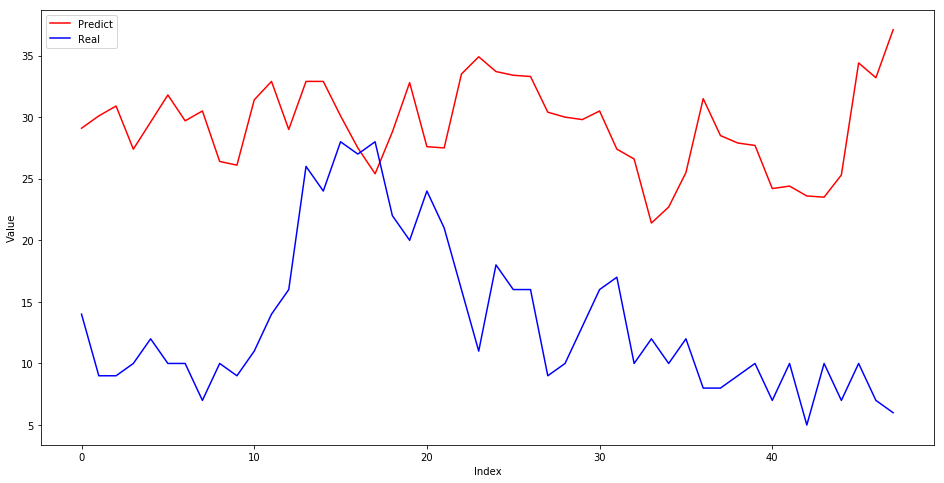

In [25]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.xlabel("Index")
plt.ylabel("Value")
y_predict = [round(y, 1) if y > 0 else 0 for y in y_predict]
y_test_round = [round(y, 1) if y > 0 else 0 for y in y_test]
plt.plot(y_predict, color="red", label="Predict")
plt.plot(y_test_round, color="blue", label="Real")
plt.legend(loc='upper left')
plt.show()

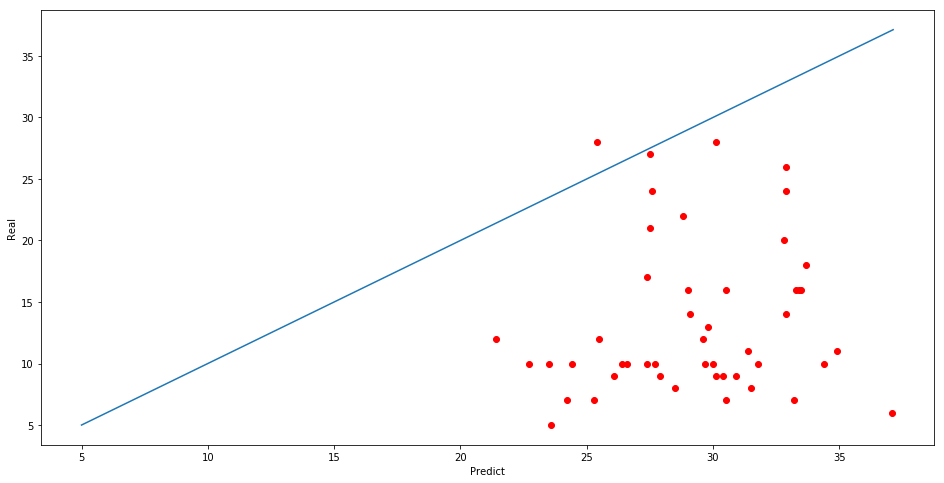

In [26]:
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.xlabel('Predict')
plt.ylabel('Real')
plt.plot(y_predict, y_test, 'ro')
plt.plot([both_min, both_max], [both_min, both_max])
plt.show()

# Measure

In [27]:
print("Mean squared error: %.4f"
      % mean_squared_error(y_predict, y_test))

Mean squared error: 296.6371
